<a href="https://colab.research.google.com/github/b4lbs/alura_ML_explorando_hiperparametros/blob/main/ML_otimizacao_com_hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

In [2]:
dados = pd.read_csv(uri).drop(columns = ['Unnamed: 0'], axis = 1)

In [3]:
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [4]:
#situação de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending = True)
X_azar = dados_azar[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar['vendido']
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [5]:
#DummyClassifier - colocando uma base de acurácia (baseline)
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 42
np.random.seed(SEED)

model = DummyClassifier(strategy='stratified')
results = cross_validate(model, X_azar, y_azar, cv = 10)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print(f'Accuracy com Dummy Stratified, 10  = [{(media - 2 * desvio_padrao) * 100 :.2f}%, {(media + 2 * desvio_padrao)*100 :.2f}%]')

Accuracy com Dummy Stratified, 10  = [49.03%, 53.81%]


DOCUMENTAÇÃO DO DUMMYCLASSIFIER: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html


In [6]:
from sklearn.tree import DecisionTreeClassifier

SEED = 42
np.random.seed(SEED)

model = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(model, X_azar, y_azar, cv = 10)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print(f'Accuracy com cross validation da Decision Tree, 10  = [{(media - 2 * desvio_padrao) * 100 :.2f}%, {(media + 2 * desvio_padrao)*100 :.2f}%]')

Accuracy com cross validation da Decision Tree, 10  = [73.83%, 77.73%]


In [7]:
np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size = 10000) #Criando a coluna com base na idade do modelo + número aleatório entre -2 e 2
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1 #Corrigindo a coluna para evitar modelo negativo ou 0
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,21
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,7
4,117384.68,1,4,12770.11290,8


In [8]:
def imprime_resultados(results):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  print(f'Accuracy médio: {media * 100:.2f}%')
  print(f'Accuracy intervalo: {(media - 2 * desvio_padrao) * 100:.2f}% - {(media + 2 * desvio_padrao) * 100 :.2f}%')

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 42
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao', scaler), ('estimador', modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, X_azar, y_azar, cv = cv, groups = dados.modelo)
imprime_resultados(results)

Accuracy médio: 76.80%
Accuracy intervalo: 74.56% - 79.04%


In [10]:
SEED = 42
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo)
imprime_resultados(results)

Accuracy médio: 75.75%
Accuracy intervalo: 73.61% - 77.90%


In [11]:
modelo

DecisionTreeClassifier(max_depth=2)

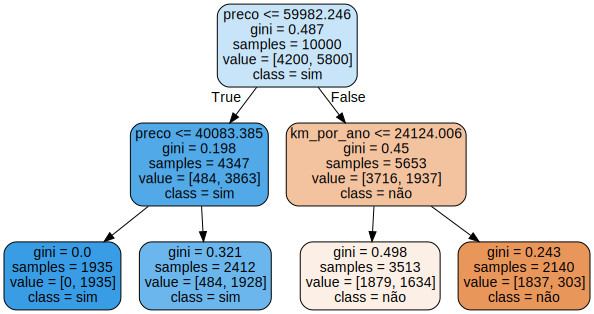

In [12]:
#Verificando as diferenças ao alterar o hiperparâmetro maxdepth
#HIPERPARÂMETROS SÃO PARÂMETROS DO MODELO DEFINIDOS ANTES DO TREINAMENTO
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(X_azar, y_azar)
features = X_azar.columns
dot_data = export_graphviz(modelo, out_file = None, filled = True, rounded = True, class_names = ["não", "sim"], feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [13]:
SEED = 42
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo)
imprime_resultados(results)

Accuracy médio: 78.64%
Accuracy intervalo: 76.18% - 81.11%


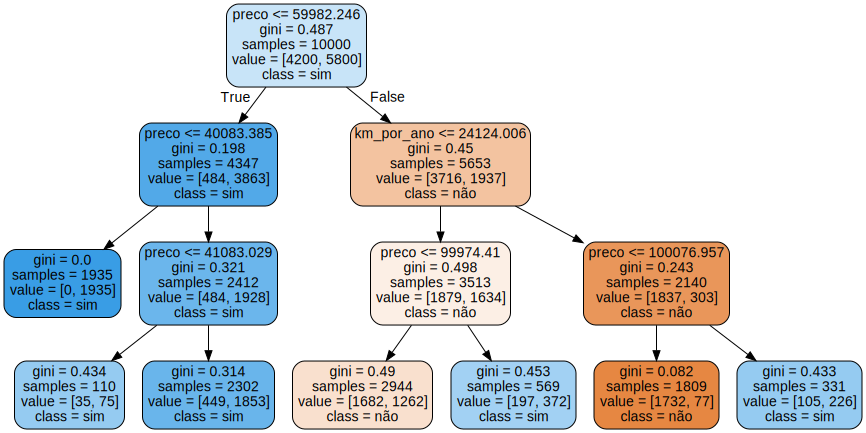

In [14]:
modelo.fit(X_azar, y_azar)
features = X_azar.columns
dot_data = export_graphviz(modelo, out_file = None, filled = True, rounded = True, class_names = ["não", "sim"], feature_names = features)

graph = graphviz.Source(dot_data)
graph

TESTANDO VÁRIOS DEPTHS DA DECISION TREE


In [15]:
def roda_arvore_de_decisao(max_depth):
  SEED = 42
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo)
  media = results['test_score'].mean() * 100
  print(f'max_depth = {max_depth}, media = {media :.2f}')

for i in range(1, 33):
  roda_arvore_de_decisao(i)

max_depth = 1, media = 75.75
max_depth = 2, media = 75.75
max_depth = 3, media = 78.64
max_depth = 4, media = 78.55
max_depth = 5, media = 78.54
max_depth = 6, media = 78.33
max_depth = 7, media = 77.88
max_depth = 8, media = 77.85
max_depth = 9, media = 77.54
max_depth = 10, media = 77.19
max_depth = 11, media = 76.73
max_depth = 12, media = 76.49
max_depth = 13, media = 75.88
max_depth = 14, media = 75.51
max_depth = 15, media = 75.24
max_depth = 16, media = 74.88
max_depth = 17, media = 74.15
max_depth = 18, media = 74.15
max_depth = 19, media = 73.99
max_depth = 20, media = 73.43
max_depth = 21, media = 73.43
max_depth = 22, media = 73.30
max_depth = 23, media = 73.40
max_depth = 24, media = 72.79
max_depth = 25, media = 72.94
max_depth = 26, media = 72.63
max_depth = 27, media = 72.67
max_depth = 28, media = 72.80
max_depth = 29, media = 72.79
max_depth = 30, media = 72.35
max_depth = 31, media = 72.48
max_depth = 32, media = 72.32


Pode-se observar como o modelo vai ficando em overfitting

In [16]:
def roda_arvore_de_decisao(max_depth):
  SEED = 42
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score= True)
  teste = results['test_score'].mean() * 100
  treino = results['train_score'].mean() * 100
  print(f'max_depth = {max_depth}, treino = {treino :.2f}, teste = {teste :.2f}')

for i in range(1, 33):
  roda_arvore_de_decisao(i)

max_depth = 1, treino = 75.79, teste = 75.75
max_depth = 2, treino = 75.79, teste = 75.75
max_depth = 3, treino = 78.76, teste = 78.64
max_depth = 4, treino = 78.81, teste = 78.55
max_depth = 5, treino = 78.97, teste = 78.54
max_depth = 6, treino = 79.17, teste = 78.33
max_depth = 7, treino = 79.46, teste = 77.88
max_depth = 8, treino = 79.85, teste = 77.85
max_depth = 9, treino = 80.33, teste = 77.54
max_depth = 10, treino = 81.04, teste = 77.19
max_depth = 11, treino = 81.90, teste = 76.73
max_depth = 12, treino = 82.75, teste = 76.49
max_depth = 13, treino = 83.68, teste = 75.88
max_depth = 14, treino = 84.67, teste = 75.51
max_depth = 15, treino = 85.68, teste = 75.24
max_depth = 16, treino = 86.73, teste = 74.88
max_depth = 17, treino = 87.79, teste = 74.15
max_depth = 18, treino = 88.84, teste = 74.15
max_depth = 19, treino = 89.86, teste = 73.99
max_depth = 20, treino = 90.90, teste = 73.43
max_depth = 21, treino = 91.82, teste = 73.43
max_depth = 22, treino = 92.79, teste = 73.

In [17]:
def roda_arvore_de_decisao(max_depth):
  SEED = 42
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score= True)
  teste = results['test_score'].mean() * 100
  treino = results['train_score'].mean() * 100
  tabela = [max_depth, treino, teste]
  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range(1, 33)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test"])
resultados.head()

,max_depth,train,test
0,1,75.792135,75.753010
1,2,75.792135,75.753010
2,3,78.755485,78.643748
3,4,78.807710,78.553598
4,5,78.966640,78.544378


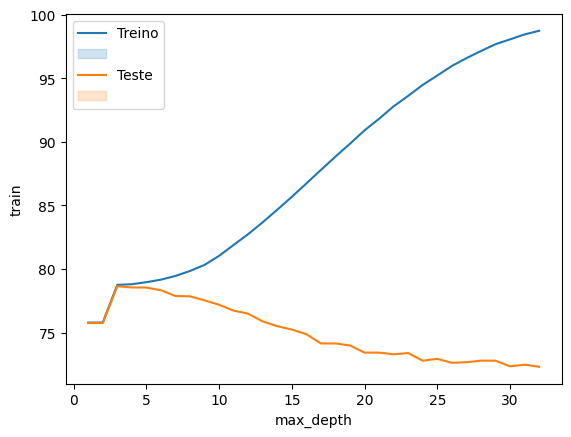

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "", "Teste", ""])

In [19]:
resultados.sort_values("test", ascending = False).head()

,max_depth,train,test
2,3,78.755485,78.643748
3,4,78.807710,78.553598
4,5,78.966640,78.544378
5,6,79.165480,78.333778
6,7,79.458831,77.882559


Explorando hiperparâmetros em 2 dimensões


In [20]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 42
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score= True)
  teste = results['test_score'].mean() * 100
  treino = results['train_score'].mean() * 100
  tabela = [max_depth, min_samples_leaf, treino, teste]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth","min_samples_leaf", "train", "test"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,train,test
0,1,32,75.792135,75.75301
1,1,64,75.792135,75.75301
2,1,128,75.792135,75.75301
3,1,256,75.792135,75.75301
4,2,32,75.792135,75.75301


In [21]:
resultados.sort_values("test", ascending = False).head()

,max_depth,min_samples_leaf,train,test
11,3,256,78.752152,78.653748
15,4,256,78.752152,78.653748
14,4,128,78.752152,78.653748
13,4,64,78.752152,78.653748
8,3,32,78.752152,78.653748


In [22]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,0.539788,0.066705
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.399845,0.381598
train,5.397881e-01,-3.998450e-01,1.000000,0.270683
test,6.670503e-02,3.815977e-01,0.270683,1.000000


<Axes: >

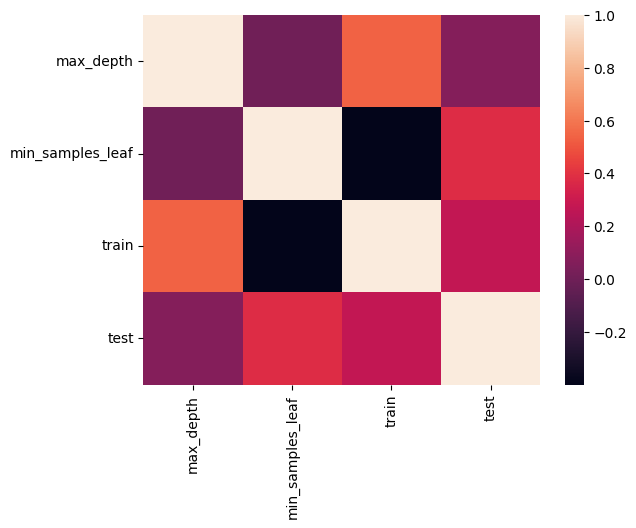

In [23]:
sns.heatmap(corr)

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='train', ylabel='min_samples_leaf'>,
        <Axes: xlabel='test', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='train'>,
        <Axes: xlabel='min_samples_leaf', ylabel='train'>,
        <Axes: xlabel='train', ylabel='train'>,
        <Axes: xlabel='test', ylabel='train'>],
       [<Axes: xlabel='max_depth', ylabel='test'>,
        <Axes: xlabel='min_samples_leaf', ylabel='test'>,
        <Axes: xlabel='train', ylabel='test'>,
        <Axes: xlabel='test', ylabel='test'>]], dtype=object)

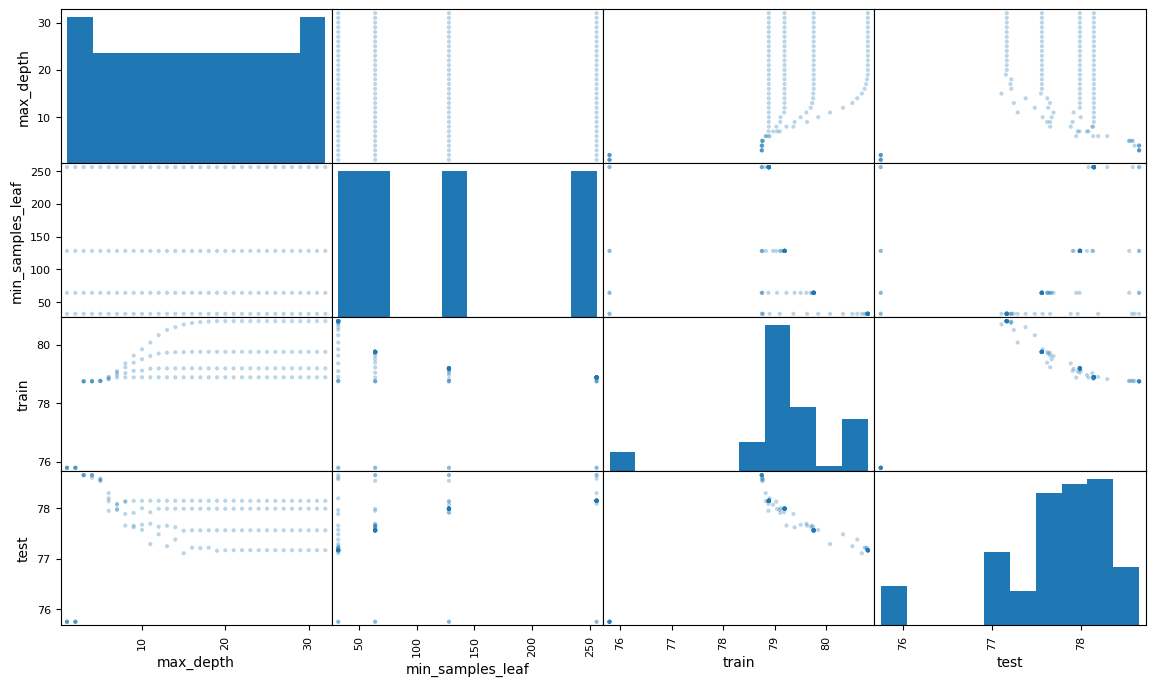

In [24]:
pd.plotting.scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

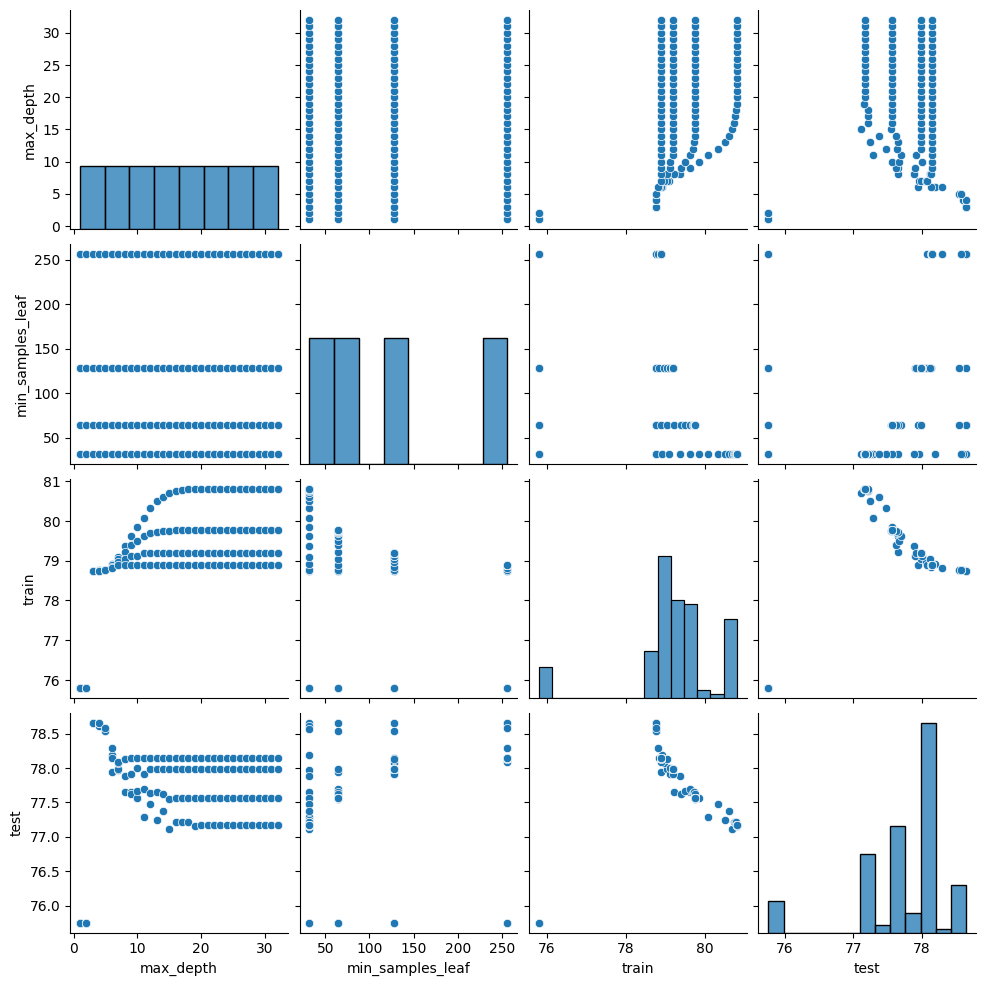

In [25]:
sns.pairplot(resultados)

<ipython-input-26-e8aa2d4bae4d>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

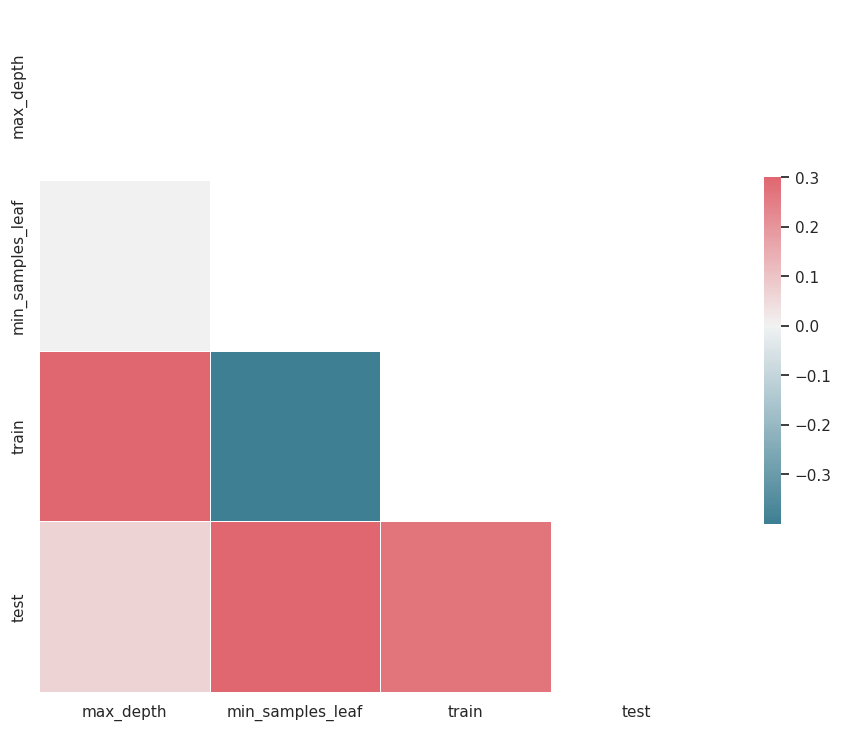

In [26]:
from string import ascii_letters

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
# Explorando outro espaço
# Essa abordagem não garante encontrar o melhor resultado possível
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth","min_samples_leaf", "train", "test"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,train,test
0,1,128,75.792135,75.75301
1,1,192,75.792135,75.75301
2,1,256,75.792135,75.75301
3,1,512,75.792135,75.75301
4,2,128,75.792135,75.75301


In [28]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,6.863211e-17,0.352218,0.269294
min_samples_leaf,6.863211e-17,1.000000e+00,-0.637453,-0.417661
train,3.522184e-01,-6.374529e-01,1.000000,0.916257
test,2.692938e-01,-4.176608e-01,0.916257,1.000000


<ipython-input-29-cbfd79cd604b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

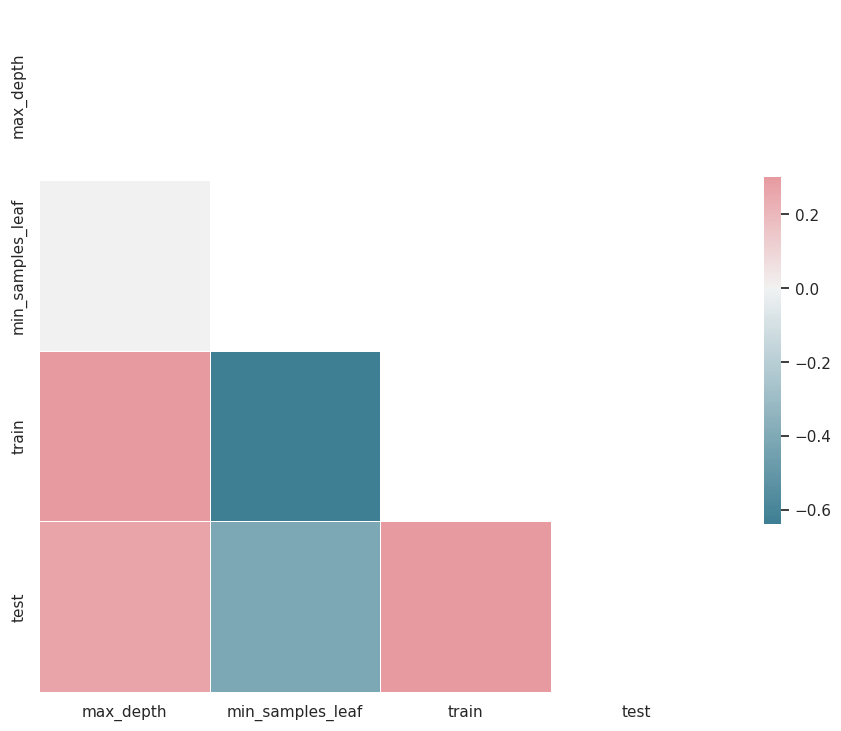

In [29]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
resultados.sort_values("test", ascending = False).head()

,max_depth,min_samples_leaf,train,test
10,3,256,78.752152,78.653748
13,4,192,78.752152,78.653748
8,3,128,78.752152,78.653748
9,3,192,78.752152,78.653748
14,4,256,78.752152,78.653748


In [31]:
#EXPLORANDO 3 HIPERPARÂMETROS E O TEMPO DO CROSS VALIDATION
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 42
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score= True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  teste = results['test_score'].mean() * 100
  treino = results['train_score'].mean() * 100
  tabela = [max_depth, min_samples_leaf, min_samples_split, treino, teste, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth","min_samples_leaf", "min_samples_split", "train", "test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.792135,75.75301,0.007623,0.002369
1,1,32,64,75.792135,75.75301,0.007633,0.002686
2,1,32,128,75.792135,75.75301,0.008197,0.002997
3,1,32,256,75.792135,75.75301,0.007723,0.003270
4,1,64,32,75.792135,75.75301,0.008008,0.002768


In [32]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
max_depth,1.000000e+00,1.300685e-16,4.182375e-16,0.533036,0.120156,0.503863,0.136183
min_samples_leaf,1.300685e-16,1.000000e+00,0.000000e+00,-0.342634,0.274215,-0.399335,0.092341
min_samples_split,4.182375e-16,0.000000e+00,1.000000e+00,-0.111695,0.165711,-0.071399,-0.022657
train,5.330355e-01,-3.426338e-01,-1.116945e-01,1.000000,0.411001,0.785671,0.160993
test,1.201559e-01,2.742150e-01,1.657110e-01,0.411001,1.000000,0.119444,0.158385
fit_time,5.038633e-01,-3.993348e-01,-7.139866e-02,0.785671,0.119444,1.000000,0.570553
score_time,1.361826e-01,9.234074e-02,-2.265695e-02,0.160993,0.158385,0.570553,1.000000


<ipython-input-33-cbfd79cd604b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

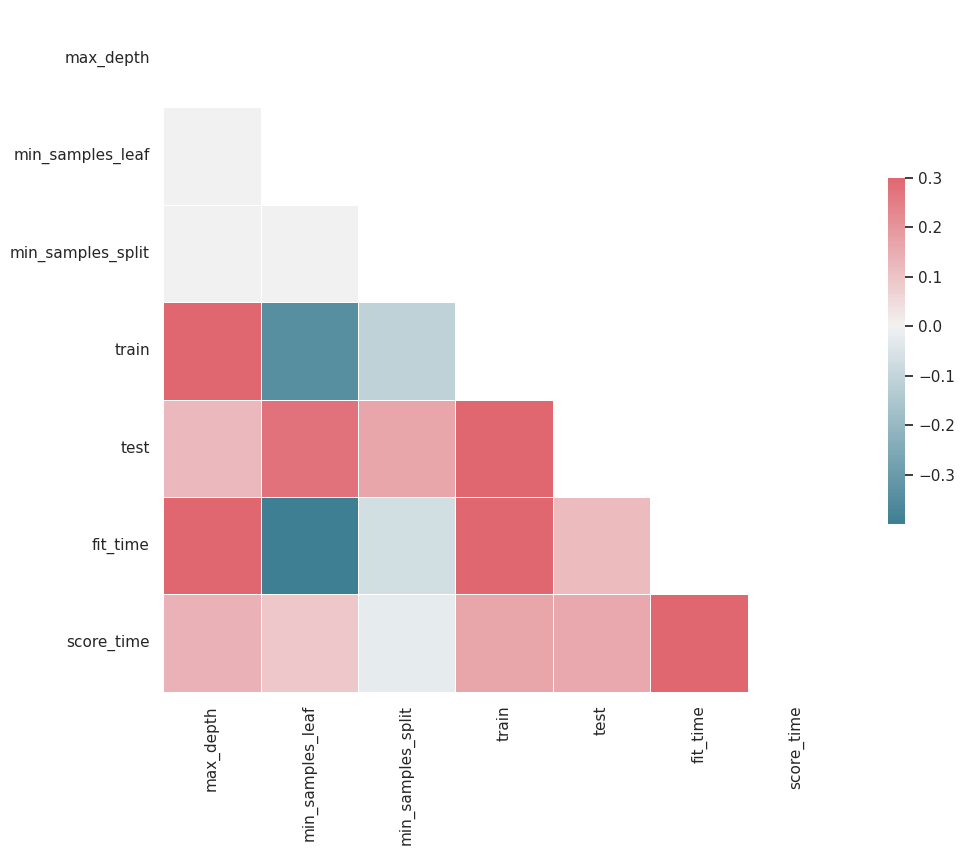

In [33]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
resultados.sort_values("test", ascending = False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
62,4,256,128,78.752152,78.653748,0.015550,0.002568
42,3,128,128,78.752152,78.653748,0.019170,0.003683
61,4,256,64,78.752152,78.653748,0.015662,0.002500
32,3,32,32,78.752152,78.653748,0.013637,0.002392
33,3,32,64,78.752152,78.653748,0.013885,0.002691


Explorando espaço de hiper parâmetros com GridSearchCV


In [35]:
from sklearn.model_selection import GridSearchCV

SEED = 42
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros,
                     cv = GroupKFold(n_splits = 10))
busca.fit(X_azar, y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013916,0.000476,0.002591,0.000162,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790744,...,0.79,0.801005,0.781633,0.772317,0.759878,0.795411,0.787339,0.786537,0.012354,1
1,0.014000,0.000863,0.002819,0.000718,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790744,...,0.79,0.801005,0.781633,0.772317,0.759878,0.795411,0.787339,0.786537,0.012354,1
2,0.014088,0.000805,0.002807,0.000775,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790744,...,0.79,0.801005,0.781633,0.772317,0.759878,0.795411,0.787339,0.786537,0.012354,1
3,0.014135,0.001219,0.002546,0.000423,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790744,...,0.79,0.801005,0.781633,0.772317,0.759878,0.795411,0.787339,0.786537,0.012354,1
4,0.013617,0.000337,0.002417,0.000126,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790744,...,0.79,0.801005,0.781633,0.772317,0.759878,0.795411,0.787339,0.786537,0.012354,1


In [36]:
busca.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 32,
 'min_samples_split': 32}

In [37]:
busca.best_score_ * 100

78.65374799994729

In [38]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [39]:
#abordagem otimista (EVITAR ESSA ABORDAGEM)
from sklearn.metrics import accuracy_score

predicoes = melhor.predict(X_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print(f'Accuracy para os dados foi {accuracy:.2f}%.')

Accuracy para os dados foi 78.75%.


USANDO NESTED CROSS VALIDATION PARA EVITAR VÍCIO NOS DADOS

In [47]:
#Usando KFold ao invés de GroupKFold devido a um bug
from sklearn.model_selection import cross_val_score, KFold

SEED = 42
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros,
                     cv = KFold(n_splits = 5, shuffle = True))
busca.fit(X_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014352,0.001445,0.003473,0.000530,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7845,0.7855,0.7885,0.793,0.7825,0.7868,0.003655,1
1,0.013645,0.000512,0.003425,0.000247,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7845,0.7855,0.7885,0.793,0.7825,0.7868,0.003655,1
2,0.013148,0.000375,0.003005,0.000271,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7845,0.7855,0.7885,0.793,0.7825,0.7868,0.003655,1
3,0.013458,0.001407,0.002629,0.000175,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7845,0.7855,0.7885,0.793,0.7825,0.7868,0.003655,1
4,0.012422,0.000182,0.002920,0.000750,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7845,0.7855,0.7885,0.793,0.7825,0.7868,0.003655,1


In [48]:
scores = cross_val_score(busca, X_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
scores

array([0.802 , 0.774 , 0.7795, 0.789 , 0.783 ])

In [50]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print(f'Acurracy médio: {media:.2f}')
  print(f'Intervalo [{media - 2 * desvio:.2f} - {media + 2 * desvio:.2f}]')

imprime_score(scores)

Acurracy médio: 78.55
Intervalo [76.63 - 80.47]


In [51]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

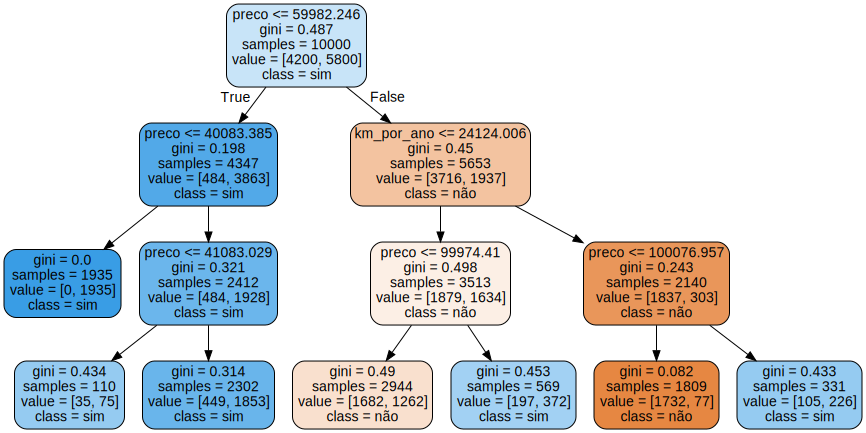

In [53]:
features = X_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph